<center><img src="img.png" width='1000' height='350'><center>

#### Dans un monde ou les inégalitées règnent, l'Organisation des Nations Unies de l'agriculture et de la nourriture souhaite réaliser une étude sur le théme de la sous nutrition dans le monde en 2017.  

* ##### L'étude est basée sur 4 fichiers csv : 

    *  ##### 4 fichiers provenant du site FAO.com sur :
        * ##### La disponibilité alimentaire pour chaque pays en 2013 qui contient 17 variables 
        * ##### Les insécuritées alimentaires qui contient 3 variables
        * ##### La population qui contient 3 variables 
        * ##### Les aides alimentaires qui contient 4 variables 
    





In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  

In [139]:
aide_alimentaire = pd.read_csv('CSV/aide_alimentaire.csv')
sous_nutrition = pd.read_csv('CSV/sous_nutrition.csv')
dispo_alimentaire = pd.read_csv('CSV/dispo_alimentaire.csv')
population = pd.read_csv('CSV/population.csv')

In [140]:
#display(aide_alimentaire.head())
#display(sous_nutrition.head())
#display(dispo_alimentaire.head())
#display(population.head())



##### Ici la valeur <0.1 a été changé en 0.05 de maniere à ce que les différents calculs soient réalisables . Cette valeur est arbitraire et non parfaitement juste, cela va rendre les résultats pour les pays avec des populations <0.1 million moins précis.

In [141]:
sous_nutrition.loc[sous_nutrition['Valeur'] == '<0.1', 'Valeur'] = '0.05'
sous_nutrition['Valeur'] = sous_nutrition["Valeur"].astype(float)
sous_nutrition["Valeur"].fillna(value=0, inplace=True)
sous_nutrition_2017 = sous_nutrition.loc[(sous_nutrition['Année']=='2016-2018'),:]
total_sous_nutrition_2017 = sous_nutrition_2017['Valeur'].sum()
population_2017 = round(population.loc[population['Année']== 2017 ,'Valeur'].sum(),) * 1000
proportion_malnutrition_2017 = round((total_sous_nutrition_2017 * 1000000) / population_2017,3)


print("En 2017, la poopulation totale était de",round(population_2017/1000000000,2),"Milliards d'êtres humains et la quantitée de personne sous nourris était de",total_sous_nutrition_2017,"millions de personnes ce qui fait qu'en 2017",round(proportion_malnutrition_2017*100,2),"% de la population était mal nourris")
print("Cela veux dire qu'en 2017, 1 personne sur 15 est victime de sous nutrition")

En 2017, la poopulation totale était de 7.55 Milliards d'êtres humains et la quantitée de personne sous nourris était de 536.7 millions de personnes ce qui fait qu'en 2017 7.1 % de la population était mal nourris
Cela veux dire qu'en 2017, 1 personne sur 15 est victime de sous nutrition


##### Ce calcul est basé sur la recommandation calorique journaliere nécessaire pour etre en bonne santé, cela correspond à un apport de 2500 calories par jour et par personne.

In [142]:
dispoAlimMondial = pd.merge(dispo_alimentaire[["Zone","Disponibilité alimentaire (Kcal/personne/jour)","Origine"]],population.loc[population["Année"]==2017,["Zone","Valeur"]],how='left',on='Zone')
dispoAlimMondial["dispo_Kcal"] = dispoAlimMondial["Disponibilité alimentaire (Kcal/personne/jour)"] * dispoAlimMondial["Valeur"] * 365
totalKcalHumain = round((dispoAlimMondial["dispo_Kcal"].sum()*1000)/(2500*365),)
print(round(totalKcalHumain/1000000000,2),"Milliards d'humains peuvent etre nourris en 2017 grâce aux ressources disponibles")
propTotalKcalHumain = round((totalKcalHumain*100)/ (population_2017),1)
print("Ce qui représente une proportion de ",propTotalKcalHumain,"%, par rapport à la population totale en 2017")


8.37 Milliards d'humains peuvent etre nourris en 2017 grâce aux ressources disponibles
Ce qui représente une proportion de  110.9 %, par rapport à la population totale en 2017


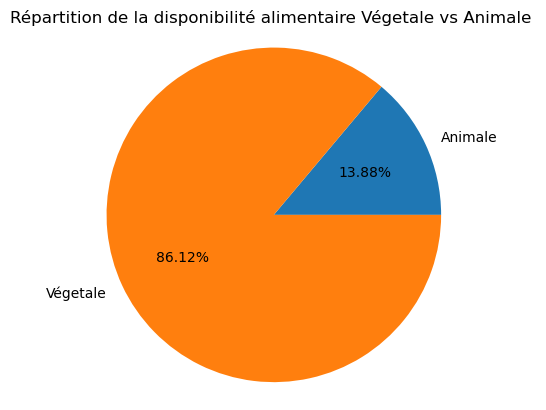

In [143]:
data = dispo_alimentaire.groupby(['Origine']).sum()['Disponibilité intérieure']
labels = 'Animale','Végetale'

plt.pie(data,labels=labels, autopct='%1.2f%%')
plt.axis('equal')
plt.title("Répartition de la disponibilité alimentaire Végetale vs Animale ")
plt.show()

In [144]:
dispoAlimMondialVege = dispoAlimMondial.loc[dispoAlimMondial["Origine"]=="vegetale"]
totalKcalHumainVege = round((dispoAlimMondialVege["dispo_Kcal"].sum()*1000)/(2500*365),)
print(round(totalKcalHumainVege/1000000000,2),"Milliards de personnes peuvent etre nourris avec de la nourriture végetale en 2017")
propTotalKcalHumainVege = round((totalKcalHumainVege*100)/ (population_2017),1)
print("Ce volume représente ",propTotalKcalHumainVege,"% de la population total de 2017")

6.9 Milliards de personnes peuvent etre nourris avec de la nourriture végetale en 2017
Ce volume représente  91.5 % de la population total de 2017


#### Répartition de la disponibilité intérieure mondiale en 2013

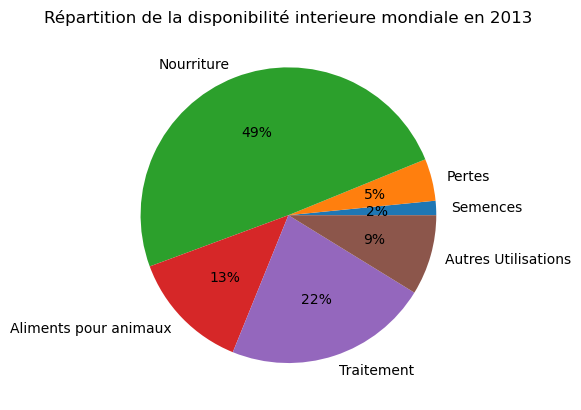

In [145]:
liste = ['Semences','Pertes','Nourriture','Aliments pour animaux',"Traitement","Autres Utilisations"]
liste2 = []
for variable in liste:
    a = dispo_alimentaire[variable].sum()
    liste2.append(a)
df1 = pd.DataFrame(liste2, index=liste, columns=["Totaux1"])
graphPie1 = plt.pie(x=df1["Totaux1"], labels=liste, autopct='%.0f%%')
plt.title("Répartition de la disponibilité interieure mondiale en 2013")
plt.show()



##### Proportion de personnes sous alimentée la plus forte

/var/folders/9z/twqnyxm936n71h0b6v7yr8vh0000gn/T/ipykernel_60126/1527420510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sous_nutrition_2017.rename(columns={'Valeur': 'Population sous alimenté'}, inplace=True)
/var/folders/9z/twqnyxm936n71h0b6v7yr8vh0000gn/T/ipykernel_60126/1527420510.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Population2017.rename(columns={'Valeur': 'Population'},inplace=True)


<AxesSubplot:xlabel='Proportion', ylabel='Zone'>

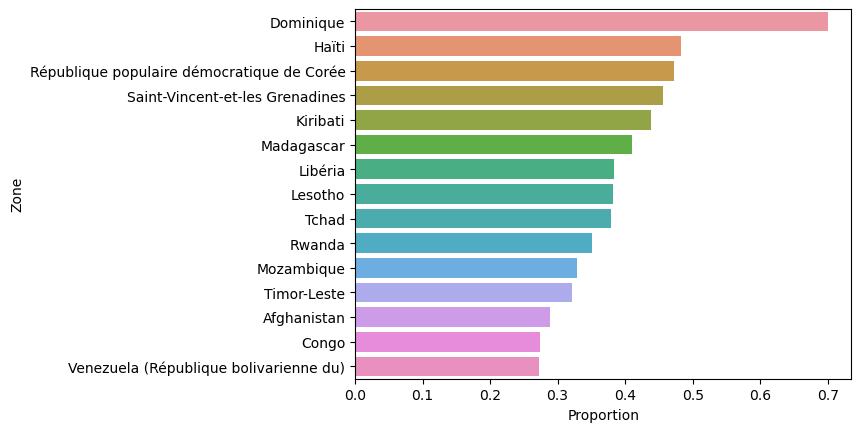

In [146]:
sous_nutrition_2017.rename(columns={'Valeur': 'Population sous alimenté'}, inplace=True)
Population2017 = population.loc[population['Année']==2017]
Population2017.rename(columns={'Valeur': 'Population'},inplace=True)
Population2017.head()
Propotion_sous_alimentation = pd.merge(sous_nutrition_2017[['Zone','Population sous alimenté']],Population2017[["Zone","Population"]], on='Zone')
Propotion_sous_alimentation["Proportion"] = (Propotion_sous_alimentation["Population sous alimenté"]*1000000)/(Propotion_sous_alimentation["Population"]*1000)
Propotion_sous_alimentation.sort_values('Proportion',ascending=False).head(10)

sns.barplot(x="Proportion",y="Zone",data=Propotion_sous_alimentation.sort_values('Proportion',ascending=False).head(15))


#### Top 5 des pays ayant bénéficiés le plus d'aide ailimentaire de 2013 jusqu'à 2017.

In [147]:
aide = aide_alimentaire[["Pays bénéficiaire", "Valeur"]].groupby(["Pays bénéficiaire"]).sum()
aide.sort_values("Valeur", ascending=False).head()



,Valeur
Pays bénéficiaire,
République arabe syrienne,1858943
Éthiopie,1381294
Yémen,1206484
Soudan du Sud,695248
Soudan,669784


#### Top 5 des pays ayant la plus grosse disponibilité alimentaire par habitant

In [148]:
dispoAlimentaire2013 = dispo_alimentaire.groupby(["Zone"]).sum("Disponibilité alimentaire (Kcal/personne/jour)")
dispoAlimentaire2013 = dispoAlimentaire2013[["Disponibilité alimentaire (Kcal/personne/jour)"]]
dispoAlimentaire2013 = dispoAlimentaire2013.sort_values("Disponibilité alimentaire (Kcal/personne/jour)", ascending=False)
popu2013 = population.loc[population["Année"]==2013,["Zone","Valeur"]]
dispHabitant = pd.merge(dispoAlimentaire2013, popu2013, on='Zone', how='left')
dispHabitant.rename(columns={'Valeur' : "Population (en millier d'habitants)"}, inplace=True)
dispHabitant.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Population (en millier d'habitants)
0,Autriche,3770.0,8556.189
1,Belgique,3737.0,11154.009
2,Turquie,3708.0,75925.462
3,États-Unis d'Amérique,3682.0,316400.538
4,Israël,3610.0,7734.841


#### Top 5 des pays ayant le moins de disponibilité alimentaire par habitant

In [149]:
dispHabitant.tail()


,Zone,Disponibilité alimentaire (Kcal/personne/jour),Population (en millier d'habitants)
169,Haïti,2089.0,10400.675
170,Afghanistan,2087.0,32269.589
171,Madagascar,2056.0,22961.255
172,Zambie,1924.0,14926.544
173,République centrafricaine,1879.0,4447.944


#### Répartiton des cereales en fonction du type d'alimentation, humaine ou animale

In [157]:
FaoCereal = pd.read_csv("CSV/FaoCereal.csv")
ListeCereal = FaoCereal.iloc[:,7]
ListeCereal = ListeCereal.unique()
ListeCereal = ListeCereal.tolist()
ListeCerealnew = []
for mot in ListeCereal :
    if mot[len(mot)-11:] == "et produits":
        ListeCerealnew.append(mot[:len(mot)-12])
    else :
        ListeCerealnew.append(mot)
ListeCerealnew.remove("Riz")
ListeCerealnew.append("Riz (Eq Blanchi)")

dispo_cereal = dispo_alimentaire.loc[dispo_alimentaire['Produit'].isin(ListeCerealnew), ('Produit','Aliments pour animaux','Nourriture',"Disponibilité intérieure")]
dispo_cereal.fillna(value=0, inplace=True)
dispo_cereal = (dispo_cereal.groupby('Produit').sum()[['Aliments pour animaux','Nourriture',"Disponibilité intérieure"]])
dispo_cereal.loc["Total"]=dispo_cereal.sum()

proportion_nourriture = (dispo_cereal["Nourriture"].sum()*100)/(dispo_cereal['Aliments pour animaux'].sum() + dispo_cereal['Nourriture'].sum())
proportion_aliment = (dispo_cereal["Aliments pour animaux"].sum()*100)/(dispo_cereal['Aliments pour animaux'].sum() + dispo_cereal['Nourriture'].sum())
print("la proportion de cereales utilisée pour l'alimentation humaine est de", round(proportion_nourriture,1),'%')
print("la proportion de cereales utilisée pour l'alimentation animale est de", round(proportion_aliment,1),"%")


la proportion de cereales utilisée pour l'alimentation humaine est de 54.1 %
la proportion de cereales utilisée pour l'alimentation animale est de 45.9 %


#### Utilisation du manioc en Thailande 

In [151]:
dispo_alimentaire_Thailande = dispo_alimentaire.loc[dispo_alimentaire["Zone"]== 'Thaïlande']
dispo_alimentaire_Thailande_Manioc = dispo_alimentaire_Thailande.loc[dispo_alimentaire_Thailande["Produit"]=='Manioc']
sous_nutrition_thailande = sous_nutrition.loc[sous_nutrition["Zone"]=='Thaïlande']
sous_nutrition_thailande_2013 = sous_nutrition_thailande.loc[sous_nutrition_thailande["Année"]=='2012-2014','Valeur']
Proportion_export_manioc = round((dispo_alimentaire_Thailande_Manioc['Exportations - Quantité'] / dispo_alimentaire_Thailande_Manioc['Production'])*100,1)

print(Proportion_export_manioc.values[0],'% de la production de Manioc en Thailande est exportée en 2013 sachant que',sous_nutrition_thailande_2013.values[0],"millions de personnes sont sous alimentées")

83.4 % de la production de Manioc en Thailande est exportée en 2013 sachant que 6.2 millions de personnes sont sous alimentées


## Conclusion

##### La sous nutrition est un problème qui est encore d'actualité. On retrouve beaucoup d'inégalitée notament sur la disponibilité alimentaire, certain pays on des ressources bien superieur à la recommandation alors que d'autre non. Ce resultat se démontre également lorsqu'on regarde la disponibilité alimentaire totale, selon ce résultat la sous nutrition ne devrait pas exister.
##### Les pays les plus frappés par ces problèmes de nutrition sont des pays sous développés ou en voie de developpement. 